<a href="https://colab.research.google.com/github/yashswagh/Personal-Projects/blob/main/leomessi'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from collections import Counter


Moduules Loading

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [4]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

Data Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
LM = pd.read_csv('/content/drive/MyDrive/DL/LeoMessidata.csv')

Basic Exploration

In [7]:
LM.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,5/1/05,H,FC Barcelona,Albacete Balompie,2:0,CF,90+1,2:0,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11/2/05,H,FC Barcelona,Panathinaikos Athens,5:0,RW,34,3:0,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:1,RW,51,2:0,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:1,RW,50,2:1,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho


In [8]:
LM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            683 non-null    object
 1   Competition       683 non-null    object
 2   Matchday          683 non-null    object
 3   Date              683 non-null    object
 4   Venue             683 non-null    object
 5   Club              683 non-null    object
 6   Opponent          683 non-null    object
 7   Result            683 non-null    object
 8   Playing_Position  683 non-null    object
 9   Minute            683 non-null    object
 10  At_score          683 non-null    object
 11  Type              682 non-null    object
 12  Goal_assist       474 non-null    object
dtypes: object(13)
memory usage: 69.5+ KB


In [9]:
LM.describe(include=['object']).T

,count,unique,top,freq
Season,683,18,11/12,73
Competition,683,7,LaLiga,474
Matchday,683,48,Group Stage,76
Date,683,439,3/7/12,5
Venue,683,2,H,410
Club,683,2,FC Barcelona,672
Opponent,683,88,Sevilla FC,38
Result,683,46,4:0,45
Playing_Position,683,9,CF,266
Minute,683,96,55,13


Goals per competition

AttributeError: ignored

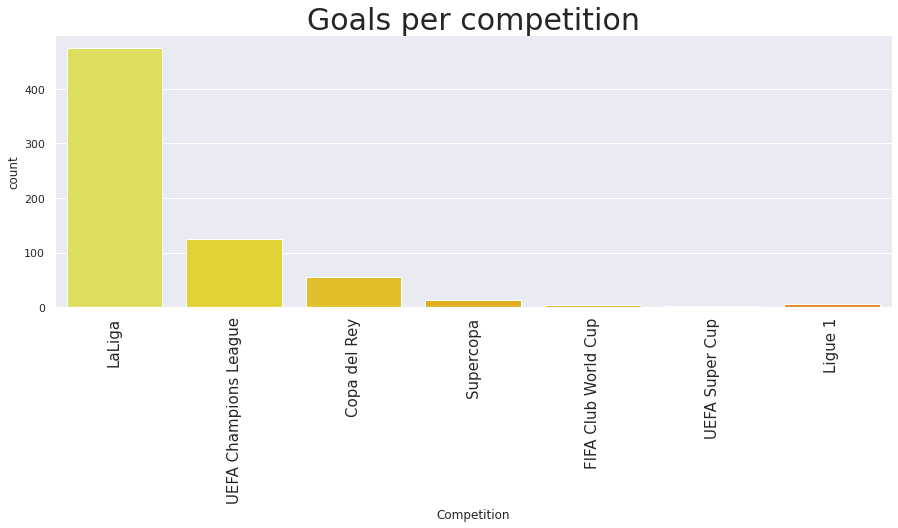

In [10]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(LM['Competition'],palette='Wistia')
p.axes.set_title("Goals per competition",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)


Observations:  Scored mostly in La-Liga.



Goals per season

AttributeError: ignored

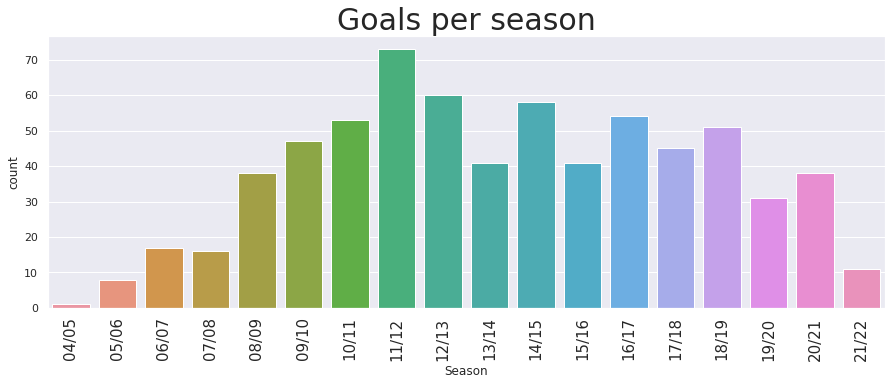

In [11]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(LM['Season'],hue_order=LM.groupby('Competition'))
p.axes.set_title("Goals per season",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)


Observations: 1. Scored most goals in 2011/12.         
2.Those years are the golden time for his career.



Goals per Clubs

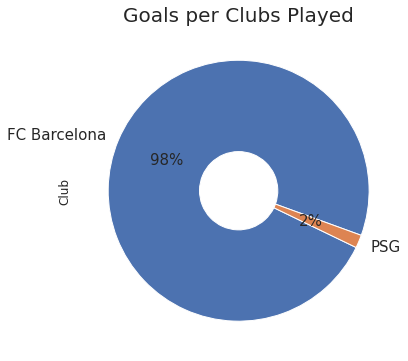

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Goals per Clubs Played', fontsize=20)
LM.Club.value_counts().plot(kind='pie', labels=['FC Barcelona', 'PSG'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})


Observations:     Scored 98% goals for Barcelona.



Goals per playing Position

AttributeError: ignored

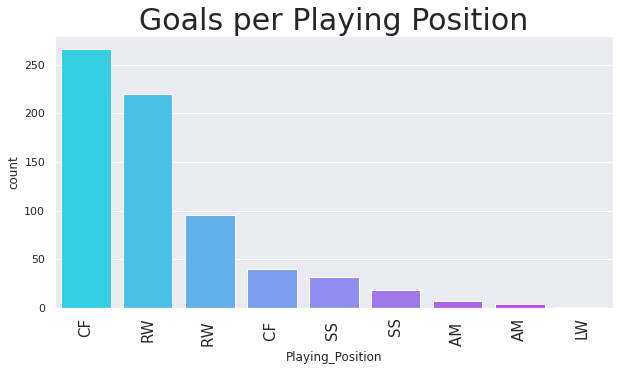

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(LM['Playing_Position'],palette='cool',order=LM.Playing_Position.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Playing Position",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)


Observations:   Played best as Center Forward; then as Right Winger.



In [ ]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")

In [ ]:
LM.loc[LM.Minute.str[:3]=='45+', 'Minute'] = '1stE'
LM.loc[LM.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
LM.loc[LM.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'

In [ ]:
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]

AttributeError: ignored

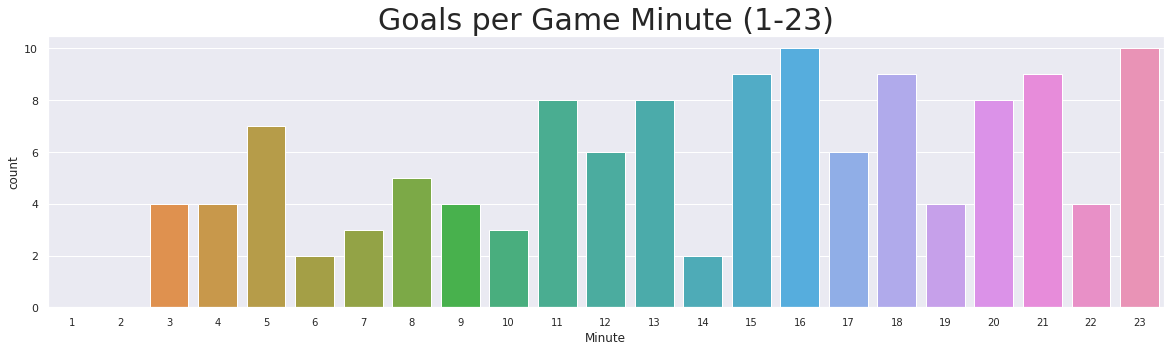

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
p=sns.countplot(LM['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (1-23)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

AttributeError: ignored

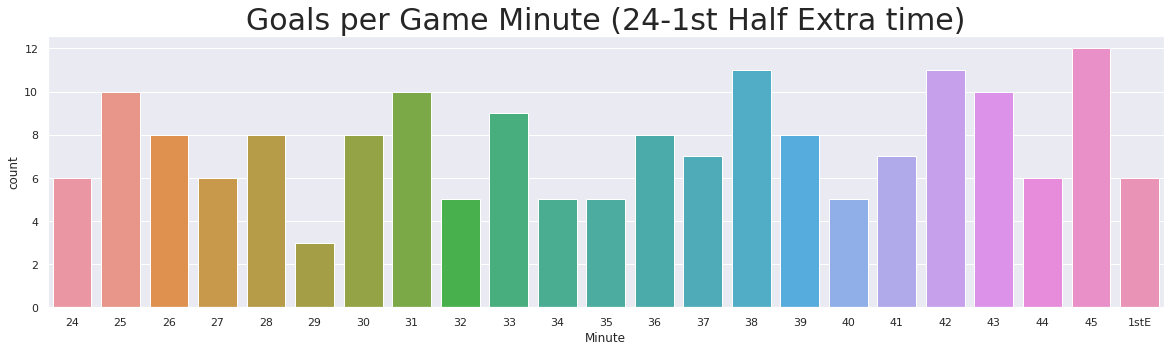

In [ ]:
p=sns.countplot(LM['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (24-1st Half Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

AttributeError: ignored

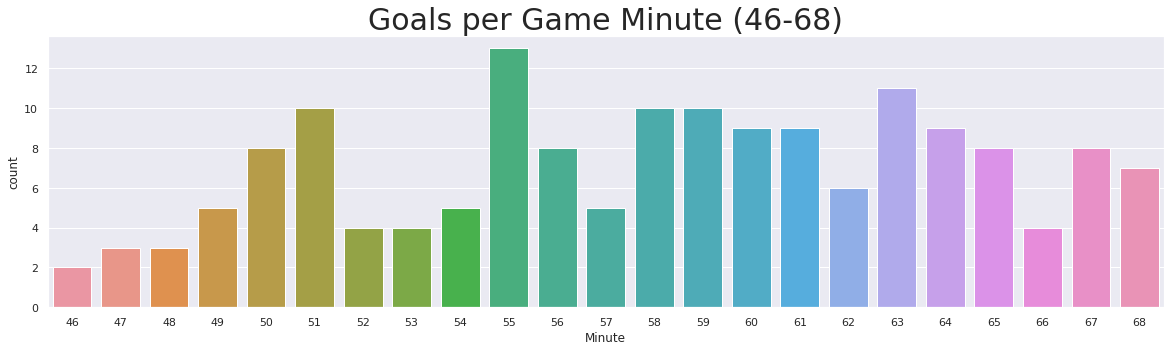

In [ ]:
p=sns.countplot(LM['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (46-68)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

AttributeError: ignored

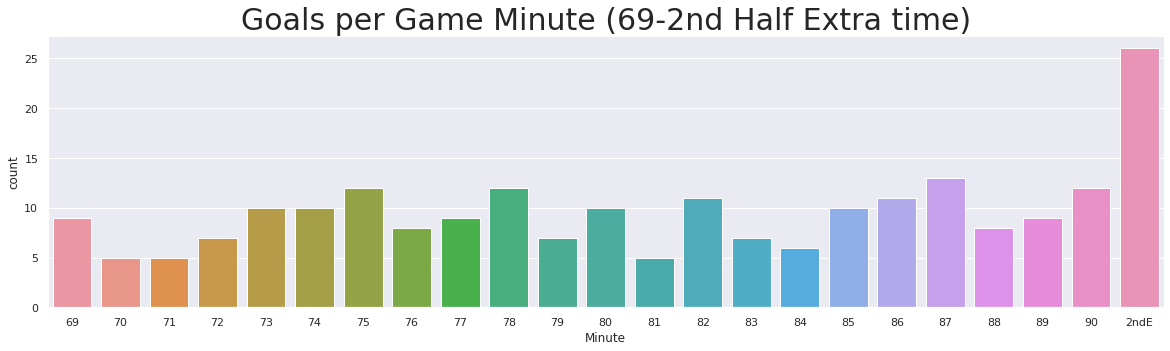

In [ ]:
p=sns.countplot(LM['Minute'],order=mins4)
p.axes.set_title("Goals per Game Minute (69-2nd Half Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

AttributeError: ignored

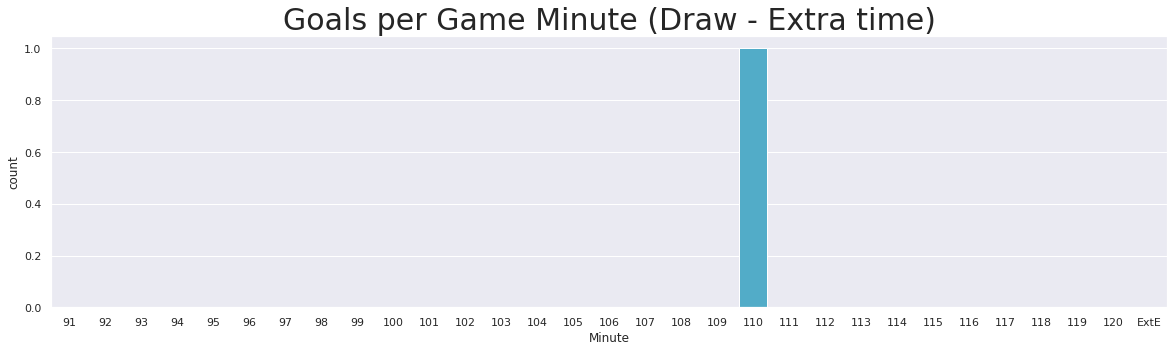

In [ ]:
p=sns.countplot(LM['Minute'],order=mins5)
p.axes.set_title("Goals per Game Minute (Draw - Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

AttributeError: ignored

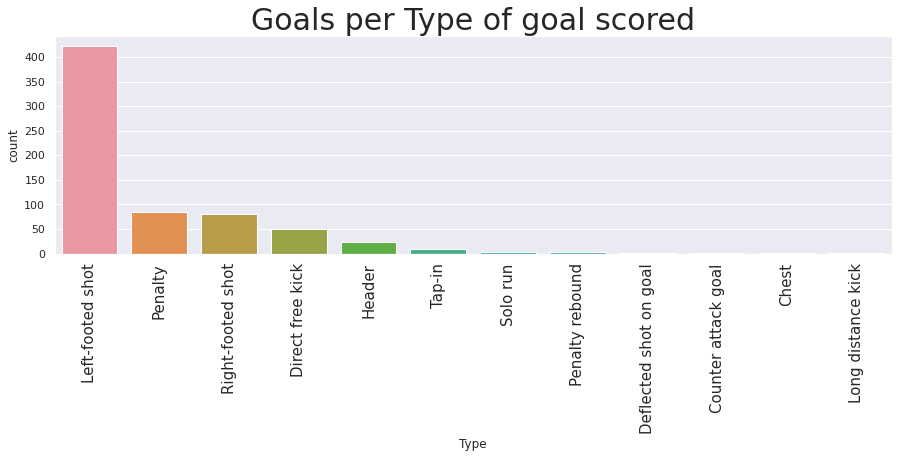

In [ ]:
sns.set(rc={'figure.figsize':(15,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(LM['Type'],hue_order=LM.groupby('Competition'),order=LM.Type.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Type of goal scored",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

AttributeError: ignored

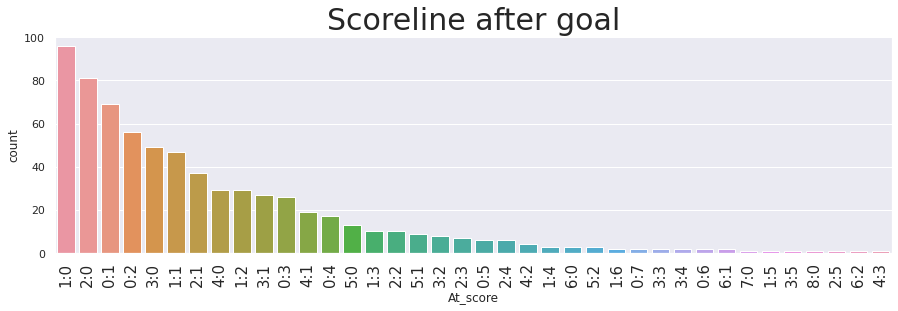

In [ ]:
sns.set(rc={'figure.figsize':(15,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(LM['At_score'],hue_order=LM.groupby('Competition'),order=LM.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoreline after goal",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

AttributeError: ignored

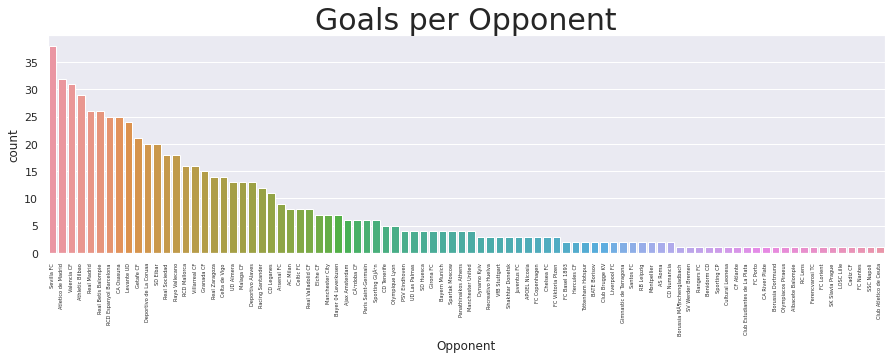

In [ ]:
sns.set(rc={'figure.figsize':(15,4)})
plt.xticks(fontsize=5,rotation='vertical')
p=sns.countplot(LM['Opponent'],hue_order=LM.groupby('Competition'),order=LM.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Opponent",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)